# **USING NEURAL NETWORK FOR COMPARISON**
## Our goal is to train a neural network which calculate the sum of given (say 4) numbers and then compare wether the result is less than a number (say 0.5) or not.
(I am using Google Colaboratory GPU for this.)


# To run on GPU, run the next cell
(Make sure to change runtime as GPU, if you're using Google Colaboratory.)

In [1]:
import tensorflow as tf
from keras import backend as K
import keras.backend.tensorflow_backend as tfback

def _get_available_gpus():
    
    #global _LOCAL_DEVICES
    if tfback._LOCAL_DEVICES is None:
        devices = tf.config.list_logical_devices()
        tfback._LOCAL_DEVICES = [x.name for x in devices]
    return [x for x in tfback._LOCAL_DEVICES if 'device:gpu' in x.lower()]

tfback._get_available_gpus = _get_available_gpus


K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


['/device:GPU:0']

Mount Google Drive for saving our model

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load important libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.optimizers import SGD

# Create Dataset
We will create a numpy array having four values for each example such that the sum of values get distributed almost equally about 0.5

Our output will be either 0 (for sum < 0.5) or 1 (for sum >= 0.5)

In [4]:
def actual_output(X):
    # Comparing X with 0.5 to get output
    Y = (np.sum(X, axis = 1) >= 0.5)*1
    
    return Y

In [5]:
def create_dataset():
    # Create random float values for input. Since we will sum 4 input values, so division by 4 is done to keep the sum between 0 and 1
    X_train = np.random.rand(100000, 4)/4
    X_val = np.random.rand(20000, 4)/4
    X_test = np.random.rand(10000, 4)/4
    # Take output for corresponding X
    Y_train = actual_output(X_train)
    Y_val = actual_output(X_val)
    Y_test = actual_output(X_test)
    
    return X_train, Y_train, X_val, Y_val, X_test, Y_test

In [6]:
X_train, Y_train, _, _, _, _ = create_dataset()
print('Shape of X_train : ' + str(X_train.shape))
print('Shape of Y_train : ' + str(Y_train.shape) + '\n')
print('X_train : ')
print(X_train)
print('\nY_train : ')
print(Y_train)
print('\nTotal count of ones in Y_train: ' + str(np.count_nonzero(Y_train == 1)))
del X_train, Y_train

Shape of X_train : (100000, 4)
Shape of Y_train : (100000,)

X_train : 
[[0.13174169 0.08742294 0.14872284 0.14351316]
 [0.16043738 0.18175475 0.06939325 0.12509022]
 [0.01782679 0.02797315 0.07812498 0.17603068]
 ...
 [0.09703257 0.10298075 0.17018159 0.13408452]
 [0.17267154 0.11877749 0.24565443 0.19629387]
 [0.12234273 0.12247236 0.04911706 0.21328029]]

Y_train : 
[1 1 0 ... 1 1 1]

Total count of ones in Y_train: 49755


We couls see that approximately half of the values are one and half are zeros. So, we will not have any issues of skew dataset.

Note : Use np.random.rand (this is uniform distribution), not np.random.randn (this is normal distribution)

# Create model
We are doing a simple operation, and thus it can be achieved by just one Dense layer of neural network. In this one layer, the linear function will find the sum and the activation function will compare the sum with 0.5

For the comparison, we could use sigmoid function.

Mathematically, you could interpret that for the linear function, the weights should be in the ratio of [1, 1, 1, 1] and bias should be in the same ratio of [-0.5] ideally.

![](https://miro.medium.com/max/2560/1*yIPIuNIn6ar7MvQnNqlWlQ.jpeg)

In [7]:
def define_model():
    # Create one Dense layer Sequential model
    model = Sequential()
    model.build(input_shape = (None, 4))
    model.add(Dense(1, activation = 'sigmoid'))
    # Compile the model
    opt = SGD(learning_rate = 0.01, momentum = 0.99)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

In [8]:
model = define_model()
model.summary()
del model

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


### This performance function is to plot the Cross Entropy Loss and Classification Accuracy graphs at the end of training of our model.

In [9]:
def performance(histories):
    plt.figure(figsize=(15, 10))
    # Plot Loss
    plt.subplot(2,2,1)
    plt.title('Cross Entropy Loss')
    plt.plot(histories.history['loss'], color = 'blue', label = 'train')
    plt.plot(histories.history['val_loss'], color = 'red', label = 'test')
    plt.legend(bbox_to_anchor=(0., 0., 0.2, 0.), loc='lower left', ncol=1, mode="expand", borderaxespad=1.)
    # Plot Accuracy
    plt.subplot(2,2,2)
    plt.title('Classification Accuracy')
    plt.plot(histories.history['accuracy'], color = 'blue', label = 'train')
    plt.plot(histories.history['val_accuracy'], color = 'red', label = 'test')
    plt.legend(bbox_to_anchor=(0., 0., 0.2, 0.), loc='lower left', ncol=1, mode="expand", borderaxespad=1.)
    # Show the plot
    plt.show()

# Training the model
Now the training part. Give all the parameters to train our model efficiently.

In [12]:
def train_model():
    # Load dataset
    X_train, Y_train, X_val, Y_val, _, _ = create_dataset()
    # Load model
    model = define_model()
    # Train the model
    history = model.fit(X_train, Y_train, epochs = 200, batch_size = 32, verbose = 1, validation_data = (X_val, Y_val))
    # Plot performance graphs
    performance(history)
    # Evaluate accuracy on validation set
    _, acc = model.evaluate(X_val, Y_val, verbose = 1)
    print('\nAccuracy of our Model on Validation Set: %.5f' % (acc*100))
    # Save our model
    model.save('/content/drive/My Drive/Rahul/ML/Is_sum_greater_than_0.5/One_layer_dense_model.h5')

Train on 100000 samples, validate on 20000 samples
Epoch 1/200
100000/100000 [==============================] - 8s 83us/step - loss: 0.3482 - accuracy: 0.9515 - val_loss: 0.2319 - val_accuracy: 0.9948
Epoch 2/200
100000/100000 [==============================] - 7s 66us/step - loss: 0.2000 - accuracy: 0.9918 - val_loss: 0.1817 - val_accuracy: 0.9688
Epoch 3/200
100000/100000 [==============================] - 6s 64us/step - loss: 0.1642 - accuracy: 0.9917 - val_loss: 0.1536 - val_accuracy: 0.9919
Epoch 4/200
100000/100000 [==============================] - 6s 64us/step - loss: 0.1450 - accuracy: 0.9931 - val_loss: 0.1385 - val_accuracy: 0.9905
Epoch 5/200
100000/100000 [==============================] - 6s 63us/step - loss: 0.1322 - accuracy: 0.9936 - val_loss: 0.1287 - val_accuracy: 0.9862
Epoch 6/200
100000/100000 [==============================] - 6s 64us/step - loss: 0.1229 - accuracy: 0.9957 - val_loss: 0.1197 - val_accuracy: 0.9914
Epoch 7/200
100000/100000 [======================

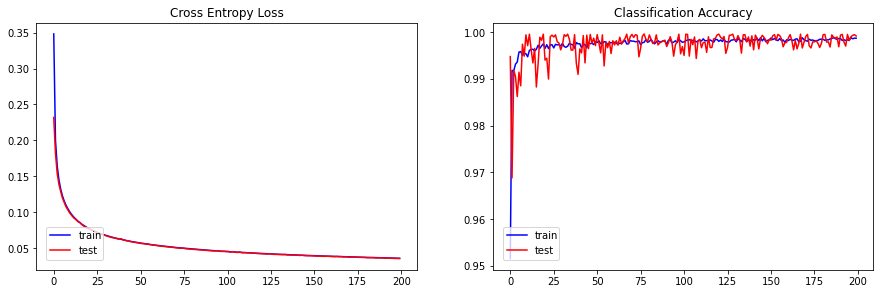

20000/20000 [==============================] - 1s 35us/step

Accuracy of our Model on Validation Set: 99.91500


In [13]:
train_model()

![](https://media.makeameme.org/created/path-to-zero-5cc711.jpg)

Woahh!! 99.915% accuracy. That's a great start. Let's check this on test set to know that out model isn't overfitting.

# Testing our Model

In [15]:
def test_model():
    # Load test set
    _, _, _, _, X_test, Y_test = create_dataset()
    # Load model
    model = load_model('/content/drive/My Drive/Rahul/ML/Is_sum_greater_than_0.5/One_layer_dense_model.h5')
    # Get weights of our model to print
    weights = model.layers[0].get_weights()[0]
    bias  = model.layers[0].get_weights()[1]
    print('Weights of our Dense layer is : ')
    print(weights)
    print('\nBias of our Dense layer is : ')
    print(bias)
    # Test our model on test set
    _, acc = model.evaluate(X_test, Y_test, verbose = 0)
    print('\nAccuracy of our Model on Test Set: %.3f' % (acc*100))
    # Get and print wrong predictions
    prediction = model.predict_classes(X_test)
    prediction = np.reshape(prediction, (prediction.shape[0]))
    wrong_predictions_X = X_test[prediction != Y_test]
    print('\nTotal count of wrong predictions : ' + str(wrong_predictions_X.shape[0]) + '\n')
    print('Sum of all four values of each wrong prediction : ')
    print(np.reshape(np.sum(wrong_predictions_X, axis = 1), (wrong_predictions_X.shape[0], 1)))

In [16]:
test_model()

Weights of our Dense layer is : 
[[123.61418 ]
 [123.8595  ]
 [123.83697 ]
 [123.493004]]

Bias of our Dense layer is : 
[-61.895977]

Accuracy of our Model on Test Set: 99.860

Total count of wrong predictions : 14

Sum of all four values of each wrong prediction : 
[[0.50032662]
 [0.50043554]
 [0.50027449]
 [0.50002692]
 [0.50013228]
 [0.500375  ]
 [0.50037033]
 [0.50024385]
 [0.50003825]
 [0.50033815]
 [0.5003856 ]
 [0.50036001]
 [0.50056155]
 [0.50019106]]


Yoo!! The model is perfect. Even the weights are in correct ratio. It is just getting wrong predictions for values whose sum is very close to 0.5

# IDEAL MODEL
Let's create a perfect/ an ideal model by assigning weights by ourselves.

![](https://i.imgflip.com/2hs8oa.jpg)

In [19]:
def ideal_model():
    # Load model
    model = load_model('/content/drive/My Drive/Rahul/ML/Is_sum_greater_than_0.5/One_layer_dense_model.h5')
    # Change the layer weights
    model.layers[0].set_weights([np.array([[1.0000000], [1.0000000], [1.0000000], [1.0000000]]), np.array([-0.5000000])]) 
    # Get and print all the weights
    weights = model.layers[0].get_weights()[0]
    bias  = model.layers[0].get_weights()[1]
    print('Weights of our Dense layer is : ')
    print(weights)
    print('\nBias of our Dense layer is : ')
    print(bias)
    # Save our model
    model.save('/content/drive/My Drive/Rahul/ML/Is_sum_greater_than_0.5/Ideal_model.h5')

In [20]:
ideal_model()

Weights of our Dense layer is : 
[[1.]
 [1.]
 [1.]
 [1.]]

Bias of our Dense layer is : 
[-0.5]


Let's test our so-called ideal model!

In [35]:
def test_ideal_model():
    # Load test set
    _, _, _, _, X_test, _ = create_dataset()
    # Creating more test set whose sum is near to 0.5
    X = np.random.rand(100000, 4)/4
    X = X/np.reshape(np.sum(X, axis = 1)*2, (X.shape[0], 1))
    X = X + (np.random.rand(X.shape[0], X.shape[1])-0.5)/99999
    # Append both the sets
    X_test = np.append(X_test, X, axis = 0)
    # Get correct output
    Y_test = actual_output(X_test)
    # Load model
    model = load_model('/content/drive/My Drive/Rahul/ML/Is_sum_greater_than_0.5/Ideal_model.h5')
    # Test our model on test set
    _, acc = model.evaluate(X_test, Y_test, verbose = 0)
    print('\nAccuracy of our Model on Test Set : %.3f' % (acc*100))
    # Get and print wrong predictions
    prediction = model.predict_classes(X_test)
    prediction = np.reshape(prediction, (prediction.shape[0]))
    wrong_predictions_X = X_test[prediction != Y_test]
    print('\nTotal count of wrong predictions : ' + str(wrong_predictions_X.shape[0]) + '\n')
    if wrong_predictions_X.shape[0] > 0:
        print('Sum of all four values of each wrong prediction : ')
        print(np.reshape(np.sum(wrong_predictions_X, axis = 1), (wrong_predictions_X.shape[0], 1)))
        wrong_predictions_Y = model.predict(wrong_predictions_X)
        print('\nThe softmax activation output of these wrong predictions : ')
        print(wrong_predictions_Y)

In [36]:
test_ideal_model()


Accuracy of our Model on Test Set : 99.479

Total count of wrong predictions : 573

Sum of all four values of each wrong prediction : 
[[0.50000003]
 [0.50000002]
 [0.50000007]
 [0.50000002]
 [0.50000007]
 [0.50000004]
 [0.50000004]
 [0.50000002]
 [0.50000006]
 [0.50000001]
 [0.50000006]
 [0.50000007]
 [0.50000005]
 [0.50000008]
 [0.50000009]
 [0.50000007]
 [0.50000003]
 [0.50000004]
 [0.50000001]
 [0.50000004]
 [0.50000003]
 [0.50000004]
 [0.50000006]
 [0.50000004]
 [0.50000003]
 [0.50000005]
 [0.50000008]
 [0.50000004]
 [0.50000005]
 [0.50000006]
 [0.50000001]
 [0.5       ]
 [0.50000005]
 [0.50000001]
 [0.50000006]
 [0.50000004]
 [0.50000007]
 [0.50000002]
 [0.50000007]
 [0.50000005]
 [0.50000005]
 [0.50000009]
 [0.50000005]
 [0.50000001]
 [0.50000006]
 [0.50000002]
 [0.50000004]
 [0.50000007]
 [0.50000007]
 [0.50000001]
 [0.50000001]
 [0.50000008]
 [0.50000005]
 [0.50000007]
 [0.50000004]
 [0.50000007]
 [0.50000004]
 [0.50000005]
 [0.50000007]
 [0.50000001]
 [0.50000002]
 [0.500000

We could see that all the wrong predictions are for the sigmoid output of 0.5. This is because of the  default threshold (Y = 1 for only X > 0.5) set on predicting classes. Currently, keras deos not allow to change the threshold. One way to solve this, is to get sigmoid output i.e. model.predict() and than compare it. Well since we are building a neural network, we will go the other way on changing it inside the keras model.

![alt text](https://miro.medium.com/max/400/1*hp93DT_YP2RfPs7eBDtPfw.jpeg)

# My Ideal Model
(I guess I am not good at making new names.)

## Creating a sequential class having our own defined threshold.

In [77]:
class MySequential(Sequential):
    def __init__(self, **kwargs):
        super(MySequential, self).__init__(**kwargs)
    # Changing the default predict_classes function
    def predict_classes(self, x, batch_size=32, verbose=0):
        proba = self.predict(x, batch_size=batch_size, verbose=verbose)
        return (proba >= 0.5).astype('int32')

Create model

In [78]:
def define_my_ideal_model():
    # Create our model
    model = MySequential()
    model.build(input_shape = (None, 4))
    model.add(Dense(1, activation = 'sigmoid'))
    # Compile our model
    opt = SGD(learning_rate = 0.01, momentum = 0.99)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    # Change the layer weights
    model.layers[0].set_weights([np.array([[1.0000000], [1.0000000], [1.0000000], [1.0000000]]), np.array([-0.5000000])])
    return model

In [79]:
def check_my_ideal_model():
    model = define_my_ideal_model()
    print(model.summary())
    # Get and print all the weights
    weights = model.layers[0].get_weights()[0]
    bias  = model.layers[0].get_weights()[1]
    print('Weights of our Dense layer is : ')
    print(weights)
    print('\nBias of our Dense layer is : ')
    print(bias)

In [80]:
check_my_ideal_model()

Model: "mysequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________
None
Weights of our Dense layer is : 
[[1.]
 [1.]
 [1.]
 [1.]]

Bias of our Dense layer is : 
[-0.5]


Everything seems good, now let's test our model.

(If you save this and load the model, then it will not identify MySequential class. So, I won't be saving this one.)

In [90]:
def test_my_ideal_model():
    # Load test set
    _, _, _, _, X_test, _ = create_dataset()
    # Creating more test set whose sum is near to 0.5
    X = np.random.rand(100000, 4)/4
    X = X/np.reshape(np.sum(X, axis = 1)*2, (X.shape[0], 1))
    X = X + (np.random.rand(X.shape[0], X.shape[1])-0.5)/99999
    # Append both the sets
    X_test = np.append(X_test, X, axis = 0)
    # Get correct output
    Y_test = actual_output(X_test)
    # Load model
    model = define_my_ideal_model()
    # Test our model on test set
    _, acc = model.evaluate(X_test, Y_test, verbose = 0)
    print('\nAccuracy of our Model on Test Set : %.3f' % (acc*100))
    # Get and print wrong predictions
    prediction = model.predict_classes(X_test)
    prediction = np.reshape(prediction, (prediction.shape[0]))
    wrong_predictions_X = X_test[prediction != Y_test]
    print('\nTotal count of wrong predictions : ' + str(wrong_predictions_X.shape[0]) + '\n')
    if wrong_predictions_X.shape[0] > 0:
        print('Sum of all four values of each wrong prediction : ')
        print(np.reshape(np.sum(wrong_predictions_X, axis = 1), (wrong_predictions_X.shape[0], 1)))
        wrong_predictions_Y = model.predict(wrong_predictions_X)
        print('\nThe softmax activation output of these wrong predictions : ')
        print(wrong_predictions_Y)

In [91]:
test_my_ideal_model()


Accuracy of our Model on Test Set : 99.498

Total count of wrong predictions : 1034

Sum of all four values of each wrong prediction : 
[[0.49999984]
 [0.49999996]
 [0.49999987]
 ...
 [0.49999991]
 [0.49999989]
 [0.49999988]]

The softmax activation output of these wrong predictions : 
[[0.5]
 [0.5]
 [0.5]
 ...
 [0.5]
 [0.5]
 [0.5]]


Okkay!! Ummmm!

![alt text](https://media.makeameme.org/created/99-accuracy-.jpg)

Yess, got it!

Keras works with float32 values, that's why, it just round offs after 7th decimal. Let's changer it to float64 values.

In [92]:
import tensorflow as tf
tf.keras.backend.set_floatx('float64')

Let's check again.

In [93]:
test_my_ideal_model()


Accuracy of our Model on Test Set : 100.000

Total count of wrong predictions : 0



![alt text](https://wompampsupport.azureedge.net/fetchimage?siteId=7575&v=2&jpgQuality=100&width=700&url=https%3A%2F%2Fi.kym-cdn.com%2Fentries%2Ficons%2Ffacebook%2F000%2F022%2F900%2F704.jpg)

## That's all for this one.
# THANK YOU!